### Assuming:
The trading week is of 5 days as saturdays and sundays are closed for trading.

# PART 1 & 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from nsepy import get_history
infy = get_history(symbol='INFY',start=date(2015,1,1),end=date(2017,1,1))
tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2017,1,1))
nifty = get_history(symbol='NIFTYIT',start=date(2015,1,1),end=date(2017,1,1),index=True)
print(infy.shape)
print(tcs.shape)
print(nifty.shape)
data=dict()
data["INFY"]=infy
data["TCS"]=tcs
data["NIFTY"]=nifty

(495, 14)
(495, 14)
(495, 6)


In [2]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [4]:
print(infy.isnull().sum(),"\n")
print((nifty.isnull().sum()),"\n")
print((tcs.isnull().sum()))

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64 

Open        0
High        0
Low         0
Close       0
Volume      0
Turnover    0
dtype: int64 

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [5]:
for i in data:
    data[i].index=pd.to_datetime(data[i].index)
for i in data:
    data[i].drop(list(data[i].select_dtypes(include=['object']).columns),axis=1,inplace=True)
    if i=="NIFTY":
        pass
data["INFY"].head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [6]:
for i in data:
    data[i]['Date']=data[i].index
data["INFY"].head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02


In [7]:
for i in data:
    data[i]["Year"]=data[i].index.year
    data[i]["Month"]=data[i].index.month
    data[i]["Day"]=data[i].index.day
data["INFY"].head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,Year,Month,Day
Date,,,,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,2015,1,1
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,2015,1,2


In [8]:
data_dixt=dict()

data_dixt["infy_max"]=data["INFY"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.max)
data_dixt["infy_min"]=data["INFY"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.min)
data_dixt["tcs_max"]=data["TCS"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.max)
data_dixt["tcs_min"]=data["TCS"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.min)
data_dixt["nifty_max"]=data["NIFTY"].pivot_table(index=["Year","Month"],values=["Close","Volume"],aggfunc=np.max)
data_dixt["nifty_min"]=data["NIFTY"].pivot_table(index=["Year","Month"],values=["Close","Volume"],aggfunc=np.min)

for ke,values in data_dixt.items():
    data_dixt[ke].reset_index(inplace=True)
    
from datetime import date
def create_date(row):
    return date(int(row.Year),int(row.Month),1)
for key,values in data_dixt.items():
    data_dixt[key]["Date"]=data_dixt[key].apply(create_date,axis=1)
data_dixt["tcs_max"].head()

,Year,Month,Close,Trades,Date
0,2015,1,2579.45,127847,2015-01-01
1,2015,2,2704.75,132132,2015-02-01
2,2015,3,2776.00,89030,2015-03-01
3,2015,4,2664.55,167402,2015-04-01
4,2015,5,2617.90,97392,2015-05-01


In [9]:
for key,values in data_dixt.items():
    data_dixt[key].drop(["Year","Month"],axis=1,inplace=True)
data_dixt['tcs_max'].columns

Index(['Close', 'Trades', 'Date'], dtype='object')

In [10]:
def adding_columns(idf):
    df=idf.copy()
    df["shifted_close"]=df.Close.shift(-1)
    df["shifted_volume"]=df.Volume.shift()
    li_close=[]
    li_volume=[]
    li_no=[]
    for idx,i in df.iterrows():      #could have used "apply" method here but this seemed faster
        vol=i["shifted_volume"]*0.1
        bool_vol=False
        bool_close=False
        if (i["shifted_volume"]+vol)<i["Volume"]:
            bool_vol=True
            li_volume.append(1)
        else:
            li_volume.append(0)
        val=i["shifted_close"]*0.1
        if abs((i["shifted_close"]-i["Close"])/i["Close"])*100 >= 2:
            bool_close=True
            li_close.append(1)
        else:
            li_close.append(0)
        if bool_close and not bool_vol:
            li_no.append(1)
        else:
            li_no.append(0)
    idf["Volume_shocks"]=li_volume
    idf["Price_shocks"]=li_close
    idf["Pricing shock without volume shock"]=li_no
for i in data:
    adding_columns(data[i])
data["INFY"].tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,Year,Month,Day,Volume_shocks,Price_shocks,Pricing shock without volume shock
Date,,,,,,,,,,,,,,,,,,,
2016-12-26,988.45,988.00,994.0,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964,2016-12-26,2016,12,26,0,0,0
2016-12-27,982.75,982.75,1001.9,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824,2016-12-27,2016,12,27,1,0,0
2016-12-28,998.95,1002.95,1009.8,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768,2016-12-28,2016,12,28,1,0,0
2016-12-29,998.50,1003.75,1008.0,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384,2016-12-29,2016,12,29,1,0,0
2016-12-30,992.35,998.00,1012.0,992.75,1011.00,1010.60,1006.91,3633884,3.659012e+14,100569,2574459,0.7085,2016-12-30,2016,12,30,1,0,0


In [11]:
from bokeh.plotting import figure, show
import bokeh.io
import warnings
warnings.filterwarnings("ignore")
bokeh.io.reset_output()
bokeh.io.output_notebook()
for i in data:
    p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
    p.line(data[i].index,data[i].Close[data[i]["Volume_shocks"]==1])
    p.line(data[i].index,data[i].Close[data[i]["Volume_shocks"]==0],color="red")
    show(p)

Loading BokehJS ...

In [12]:
def moving_average(df):
    temp_df=df.copy()
    
    p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
    p.line(temp_df.index,temp_df["Close"],legend="Closing Price")
    colors=["blue","red","green","black"]
    
    for idx,i in enumerate([20,80,120,260]):   # As i have assumed a week to be of 5 days...20 describes 4 week, 80 is for 16 week and so on
        
        temp_df ["{}_moving_avg".format(i)] = temp_df.Close.rolling(window=i).mean()
        df["{}_days_moving_avg".format(i)] = df.Close.rolling(window=i).mean()
        
        p.line(temp_df.index,temp_df["{}_moving_avg".format(i)],color=colors[idx]
               ,legend="{} weeks Moving Avg".format(i/5))
    show(p)
    
def rolling_average(df):
    dict_avg=dict()
    for i in [20,80,120,270]:   
        dict_avg[i]=df.Close.rolling(window=i).mean()
    return dict_avg
for i in data:
    moving_average(data[i])

## Checking for stationarity

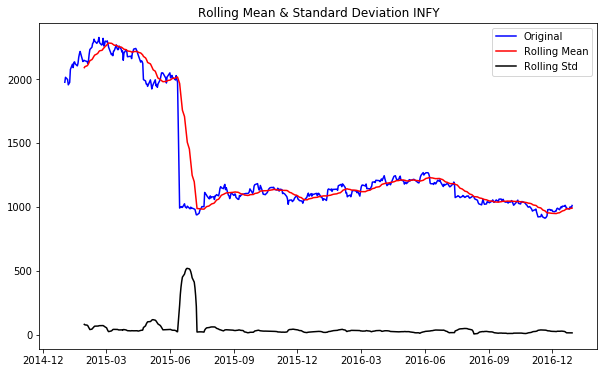

Results of Dickey-Fuller Test:
Test Statistic                  -1.580363
p-value                          0.493450
#Lags Used                       0.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


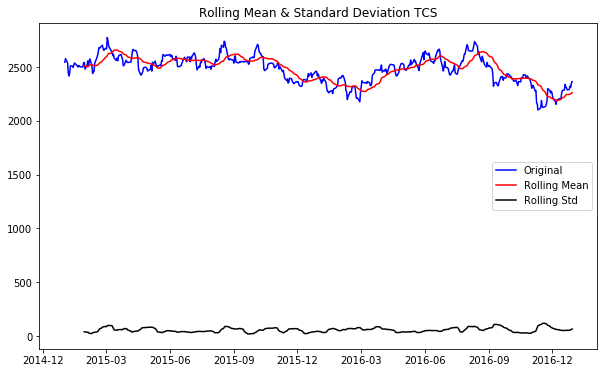

Results of Dickey-Fuller Test:
Test Statistic                  -2.724330
p-value                          0.069922
#Lags Used                       4.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64


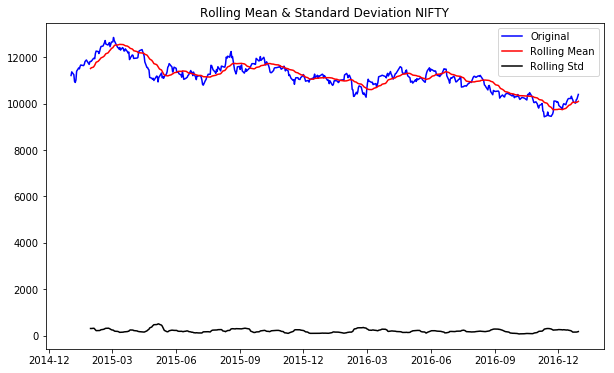

Results of Dickey-Fuller Test:
Test Statistic                  -1.910114
p-value                          0.327318
#Lags Used                       0.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


In [22]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,title):
    fig=plt.figure(figsize=(10,6))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=20).mean()
    rolstd = timeseries.rolling(window=20).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation'+" "+title)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic'
                                             ,'p-value'
                                             ,'#Lags Used'
                                             ,'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
for i in data:
    test_stationarity(data[i].Close,i)

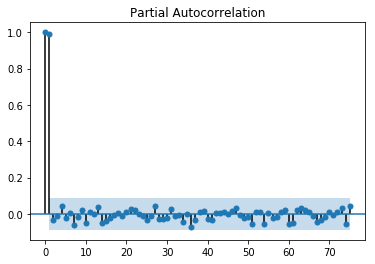

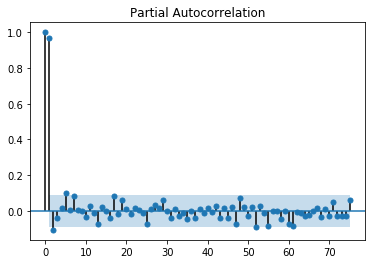

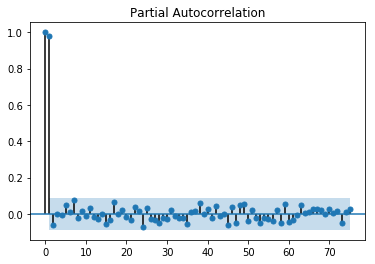

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
    plot_pacf(data[i].Close,lags=75)

# PART 3

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Close"]
    models = [
        {
            "name": "LinearRegression",
            "estimator": LinearRegression(),
            "hyperparameters":
                {
                    "n_jobs":[None,1,-1]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestRegressor(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [10,15,20],
                    "max_depth": [None,10,15,20]
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models
cols=["20_days_moving_avg","Open","Volume","High","Low","Turnover"]
for i in data:
    print("-------"i"-------")
    result = select_model(data[i].dropna(inplace=False),cols)

LinearRegression
----------------
Best Score: 0.9119746740559121
Best Parameters: {'n_jobs': None}

RandomForestClassifier
----------------------
Best Score: 0.6840826531704326
Best Parameters: {'max_depth': None, 'n_estimators': 15}

LinearRegression
----------------
Best Score: 0.9621559343952871
Best Parameters: {'n_jobs': None}

RandomForestClassifier
----------------------
Best Score: 0.8804459773701411
Best Parameters: {'max_depth': 10, 'n_estimators': 20}

LinearRegression
----------------
Best Score: 0.9614217200095063
Best Parameters: {'n_jobs': None}

RandomForestClassifier
----------------------
Best Score: 0.7872635454981788
Best Parameters: {'max_depth': 10, 'n_estimators': 15}



Since the goal mentined in the pastebin link was to only predict the tomorrows value therefore only 1 shift has been done but if more predictions ar needed to be made then num can be changed.

In [26]:
from sklearn import preprocessing, cross_validation, svm
import datetime
def predict(dataframe,num=1):
    df = dataframe[['Close', 'High', 'Low', 'Volume','Turnover']].copy()
    forecast_col = 'Close'
    df['label'] = df[forecast_col].shift(-num)

    X = np.array(df.drop(['label'], 1))
    X = preprocessing.scale(X)
    X_lately = X[-num:]
    X = X[:-num]

    df.dropna(inplace=True)

    y = np.array(df['label'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)

    forecast_set = clf.predict(X_lately)
    df['Forecast'] = np.nan
    last_date = df.iloc[-1].name
    last_unix = last_date.timestamp()
    
    one_day = 86400
    next_unix = last_unix + one_day
    next_date = datetime.datetime.fromtimestamp(next_unix)

    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[forecast_set]
    print(i," ",forecast_set)
for i in data:
    predict(data[i])#can pass a number to find the number of forecast needed to be made

INFY   [1009.268189]
TCS   [2366.69877977]
NIFTY   [10402.06753627]


In [19]:
data["INFY"].tail(1)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,Year,Month,Day,Volume_shocks,Price_shocks,Pricing shock without volume shock,20_days_moving_avg,80_days_moving_avg,120_days_moving_avg,260_days_moving_avg
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-30,992.35,998.0,1012.0,992.75,1011.0,1010.6,1006.91,3633884,3.659012e+14,100569,...,2016,12,30,1,0,0,990.4,1000.90625,1025.672917,1100.324038
